# 13장 데이터 분석 예제
* https://github.com/wesm/pydata-book

## [13.2 무비렌즈의 영화 평점 데이터]
* 1990년대 말부터 2000년대 movieLens 사용자 6000여 명에게서 수집한 4000여 편의 영화 평점 1M 데이터 제공
  * 사용자 정보: 나이, 우편번호, 성별, 직업
  * 영화 평점 정보 : 장르, 개봉 연도
  * 영화 정보 : 장르, 제목
- Gender :
  * "M" : 남성
  * "F" : 여성
- Age :
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
- Occupation :
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"
- Genres :
	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western


In [1]:
# 1. 필요한 라이브러리 임포트
import pandas as pd

In [4]:
# 데이터셋 로드
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [5]:
# 데이터셋 탐색
print(users.head(5))
print(ratings.head())
print(movies.head())

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


## [데이터 분석 문제]

### [문제 1] 하나의 테이블로 병합하기

In [7]:
# (1) ratings 테이블과 users 테이블을 병합하기 -> 그 결과를 movies 테이블과 병합하기 : 1000209 rows × 10 columns
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


### [문제 2] 성별에 따른 250건 이상의 평균 평점 정보가 있는 영화 추출하기

# groupby()('title')['rating'].mean()
## pandas.pivot_table(data=, values=, index=, columns=, aggfunc=, fill_value=)
* 주어진 데이터프레임을 특정 열을 기준으로 그룹화하기
* 다양한 집계 함수를 사용하여 요약 통계를 계산
* 주요 파라미터
  * data : 피벗 테이블을 생성할 데이터프레임
  * values : 집계할 데이터 열
  * index: 피벗 테이블의 행으로 사용할 열
  * columns: 피벗 테이블의 열로 사용할 열
  * aggfunc: 집계함수 목록
  * fill_value: 결측값을 대체할 값

In [8]:
# (1) 성별에 따른 각 영화의 평균 평점을 집계하기
mean_ratings = pd.pivot_table(data = data, values = "rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [9]:
# (2) 영화 제목별 건수 집계하기
# 데이터를 영화 제목으로 그룹화하여 size() 함수를 사용
# 동일한 영화 제목을 가지는 행들을 계산하여 반환
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [10]:
ratings_by_title.index

Index(['$1,000,000 Duck (1971)', ''Night Mother (1986)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       '...And Justice for All (1979)', '1-900 (1994)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)', '12 Angry Men (1957)',
       ...
       'Young Poisoner's Handbook, The (1995)', 'Young Sherlock Holmes (1985)',
       'Young and Innocent (1937)', 'Your Friends and Neighbors (1998)',
       'Zachariah (1971)', 'Zed & Two Noughts, A (1985)', 'Zero Effect (1998)',
       'Zero Kelvin (Kjærlighetens kjøtere) (1995)', 'Zeus and Roxanne (1997)',
       'eXistenZ (1999)'],
      dtype='object', name='title', length=3706)

In [11]:
# (4) 250건 이상의 평점 정보가 있는 영화 제목 추출
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [15]:
# (4) 성별에 따른 250건 이상의 평점 정보가 있는 영화에 대한 색인 추출하기
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


### [문제2] 장르와 연령별로 그룹하여 평균 평점을 구하기

In [16]:
# (1) 여러 장르에 속하는 영화일 경우 장르를 개별적으로 분리하기
movies["genre"] = movies.pop("genres").str.split("|") #movies["genre"] = movies.pop("genres").str.split("|") -> drop()
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [17]:
# (2) 복수 장르에 속하는 영화을 각 장르별로 나누기
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [18]:
# (3) 세 테이블을 모두 병합하여 그룹화하기
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.head(20)

,movie_id,title,genre,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation,10,5,978226474,F,35,1,95370
5,1,Toy Story (1995),Animation,18,4,978154768,F,18,3,95825
6,1,Toy Story (1995),Animation,19,5,978555994,M,1,10,48073
7,1,Toy Story (1995),Animation,21,3,978139347,M,18,16,99353
8,1,Toy Story (1995),Animation,23,4,978463614,M,35,0,90049
9,1,Toy Story (1995),Animation,26,3,978130703,M,25,7,23112


In [20]:
ratings_with_genre.shape

(2101815, 10)

In [22]:
# (4) 장르와 연령별로 그룹하여 평균 평점을 구하기
# ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean().unstack("age")
                 )
genre_ratings[:5]

# Note: pivot_table()
genre_ratings_1 = pd.pivot_table(data = rating_with_genre, values = 'rating',intex = )

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949


In [21]:
# (4) 제목과 연령별로 그룹하여 평균 평점을 구하기
# ratings_with_genre.iloc[0]
title_ratings = (ratings_with_genre.groupby(["title", "age"])
                 ["rating"].mean().unstack("age")
                 )
title_ratings.dropna(inplace=True)
title_ratings

age,1,18,25,35,45,50,56
title,,,,,,,
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
10 Things I Hate About You (1999),3.745455,3.415020,3.432950,3.102941,3.258065,3.629630,4.000000
...,...,...,...,...,...,...,...
"Young Poisoner's Handbook, The (1995)",5.000000,4.047619,3.483871,3.333333,3.500000,3.500000,4.000000
Young Sherlock Holmes (1985),3.000000,3.629630,3.448485,3.257143,3.125000,3.297297,3.388889
Your Friends and Neighbors (1998),4.000000,3.516129,3.296296,3.400000,2.750000,3.000000,4.000000


## [데이터사이언스 문제, dataminig]
* 선형회귀 분석
  * 각 장르별로 연령대와 평점 간의 관계를 분석하는 선형 회귀 모델을 구축하고, 그 성능을 비교/시각화
  * 상관관계가 있는 데이터셋을 잘 적합한 장르를 찾기(R^2제곱) 
  * age를 독립 변수로, 각 장르별 평점을 종속 변수로 사용
  * LinearRegression

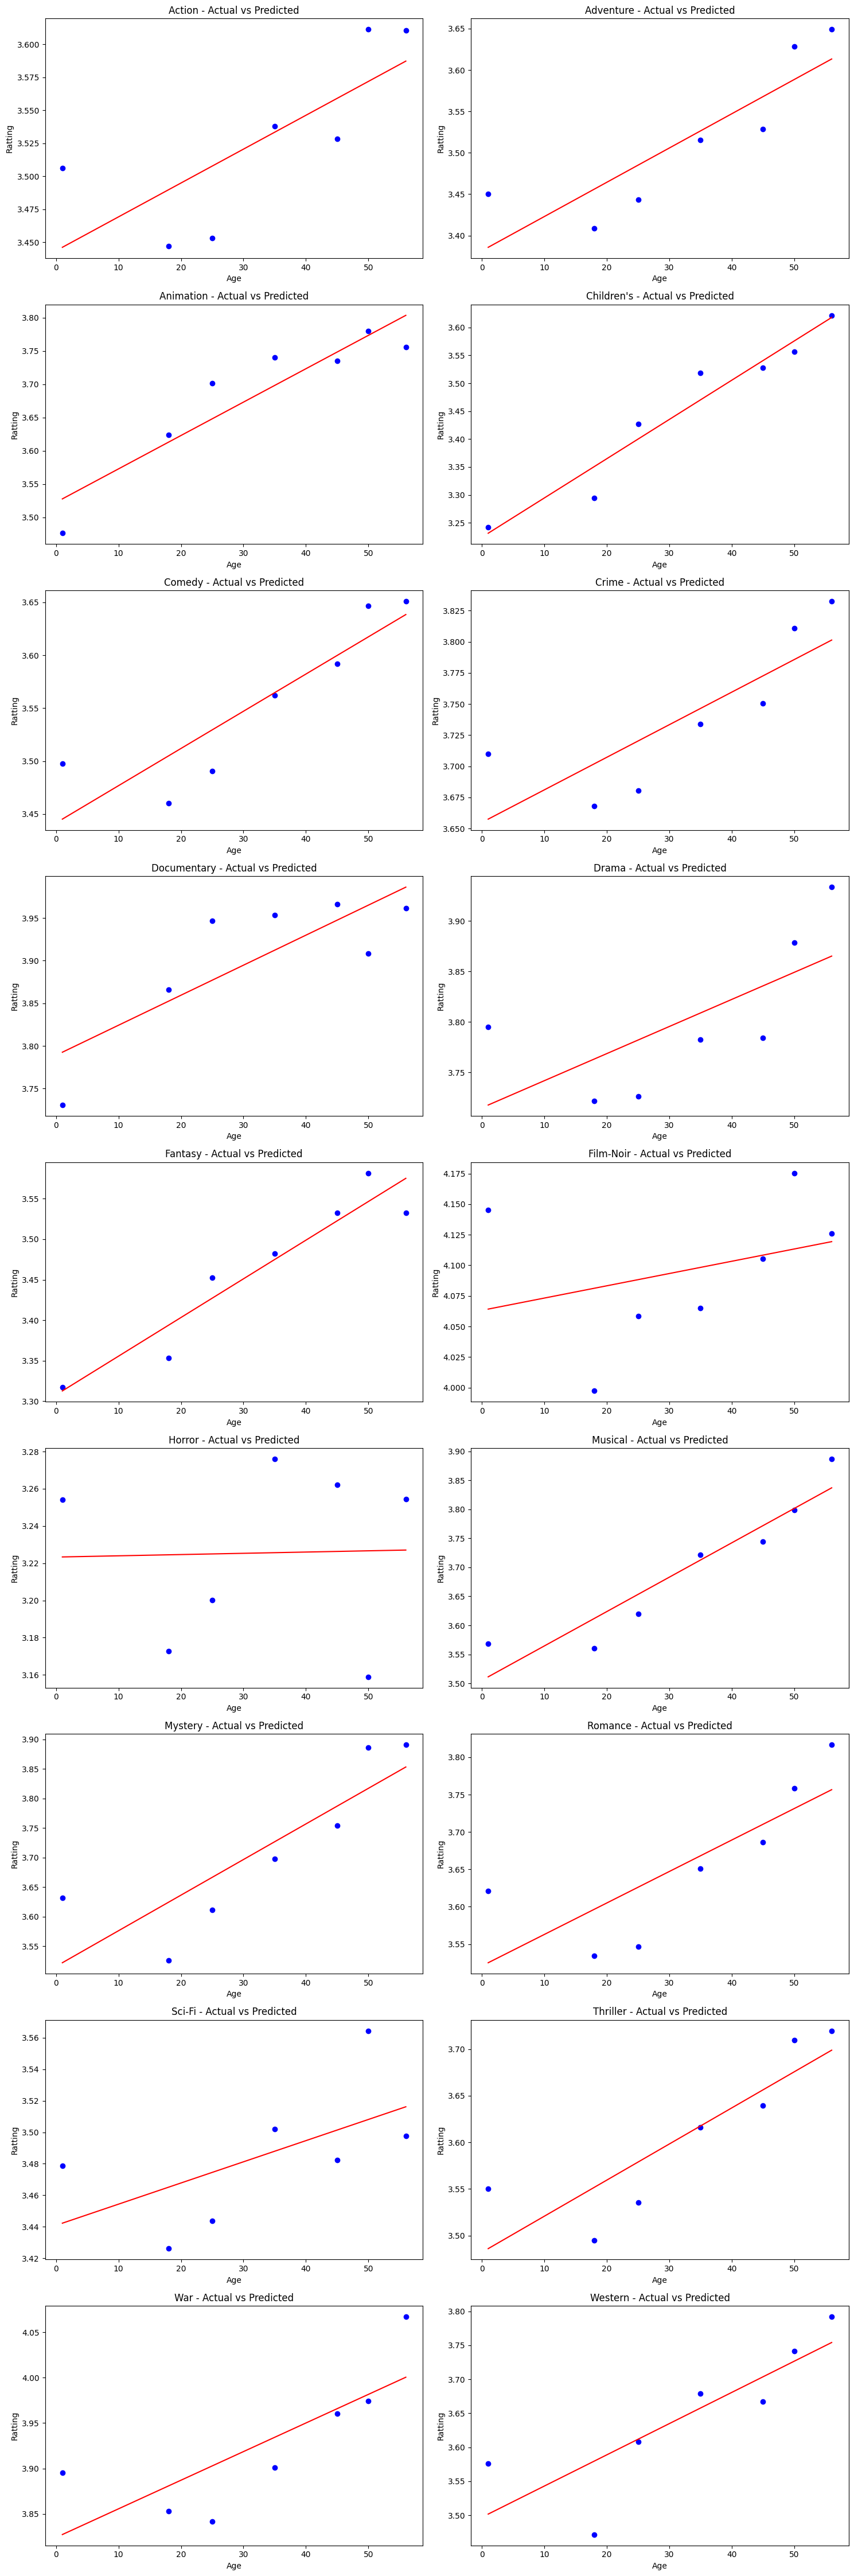

          genre       mse        r2
0        Action  0.001638  0.566914
1     Adventure  0.001804  0.755556
2     Animation  0.001409  0.853299
3    Children's  0.000985  0.942350
4        Comedy  0.001049  0.792751
5         Crime  0.001109  0.667427
6   Documentary  0.002112  0.656110
7         Drama  0.002799  0.455502
8       Fantasy  0.000778  0.904878
9     Film-Noir  0.002790  0.104910
10       Horror  0.001917  0.000767
11      Musical  0.001480  0.885220
12      Mystery  0.004705  0.715088
13      Romance  0.003519  0.621079
14       Sci-Fi  0.001124  0.343663
15     Thriller  0.001596  0.753488
16          War  0.002122  0.603866
17      Western  0.002960  0.698664


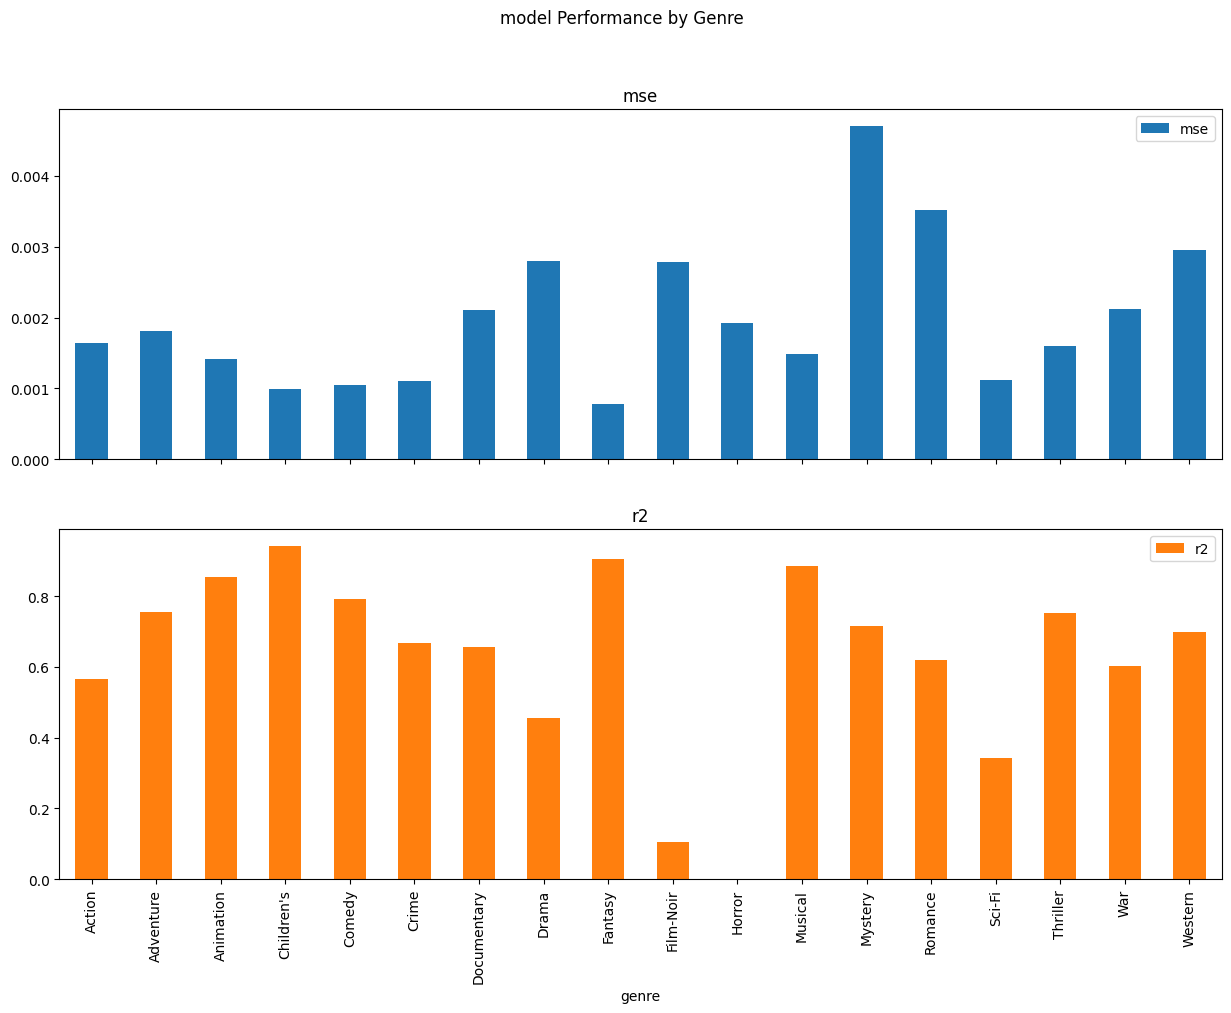

연령과 영화 평점 간의 상관관계를 가장 잘 적합하고 있는 장르 Children's


In [27]:
# 1. 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2. 데이터셋 : 데이터프레임 저장
df = genre_ratings
df.describe() 

# 3. age와 각 장르의 평점을 각각 독립 변수 X와 종속 변수 y로 설정
X = np.array([1, 18, 25, 35, 45, 50, 56]).reshape(-1,1)
results = []

# 4. subplots을 이용하여 각 장르별 선형 회귀 모델링, 성능 평가 및 저장, 실제값과 예측값 비교 시각화
fig, axes = plt.subplots(nrows=9, ncols =2, figsize = (15, 45))
axes = axes.flatten()

for idx,genre in enumerate(df.index):
    y = df.loc[genre].values # 종속변수
    # LinearRegression 모델을 사용하여 각 장르에 대해 선형 회귀 분석을 수행
    model = LinearRegression()
    model.fit(X,y)
    model.predict(X)
    y_pred = model.predict(X)
    # 모델의 성능을 MSE와 R^2 스코어로 측정
    mse = mean_squared_error(y,y_pred)
    r2 = r2_score(y,y_pred)
    # 각 장르의 MSE와 R^2 스코어를 results에 저장
    results.append({
        'genre': genre,
        'mse' : mse,
        'r2' : r2
    })
    # 각 장르에 대해 실제 값과 예측 값을 시각화
    axes[idx].scatter(X,y,color='blue')
    axes[idx].plot(X, model.predict(X), color = 'red')
    axes[idx].set_title(f'{genre} - Actual vs Predicted')
    axes[idx].set_xlabel('Age')
    axes[idx].set_ylabel('Ratting')

plt.tight_layout()
plt.show()
    
# 5. 모든 장르의 성능 평가 결과를 데이터프레임 results_df으로 저장
results_df = pd.DataFrame(results)
print(results_df)

# 6. 5단계에서 얻은 데이터프레임의 MSE와 R^2 스코어를 막대그래프로 시각화 - pandas의 데이터프레임 시각화 기능
results_df.set_index('genre', inplace=True)
results_df[['mse','r2']].plot(kind='bar',subplots = True, layout= (2,1), figsize=(15,10),title="model Performance by Genre")
plt.show()

# 상관관계를 가장 잘 적합한 장르 찾기 - R^2 스코어가 가장 높은 장르 best_genre를 찾아 출력
best_genre = results_df['r2'].idxmax()
print(f'연령과 영화 평점 간의 상관관계를 가장 잘 적합하고 있는 장르 {best_genre}')